# DAT535 - Temperature Forecasting

### Made a function that runs the specified notebook and prints the outputs. Also saves the plots with name + counter to be able to show them from main

In [1]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import base64
import os

# Got this function from ChatGpt to run notebooks with the outputs printed
def run_notebook(path):
    # Load the notebook
    with open(path) as f:
        nb = nbformat.read(f, as_version=4)
    
    # Get the directory of the notebook
    notebook_dir = os.path.dirname(path) or '.'

    # Initialize ExecutePreprocessor
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
    
    # Run the notebook
    ep.preprocess(nb, {'metadata': {'path': notebook_dir}})
    
    # Gather outputs
    all_outputs = []
    plot_counter = 0
    
    for cell in nb['cells']:
        if 'outputs' in cell:
            for output in cell['outputs']:
                if output.output_type == 'stream':
                    # Collect text outputs (printed outputs)
                    all_outputs.append(output.text)
                elif output.output_type == 'execute_result':
                    # Collect output from expressions
                    all_outputs.append(output['data'].get('text/plain', ''))
                elif output.output_type == 'error':
                    # Capture any errors that occur
                    all_outputs.append('Error: ' + ''.join(output['traceback']))
                elif output.output_type == 'display_data' and 'image/png' in output['data']:
                    # Capture matplotlib plot outputs (PNG format)
                    img_data = output['data']['image/png']
                    
                    # Save the plot as a file
                    plot_filename = f'notebook_plot_{plot_counter}.png'
                    with open(plot_filename, 'wb') as f:
                        f.write(base64.b64decode(img_data))
                    
                    all_outputs.append(f"Saved plot: {plot_filename}")
                    plot_counter += 1
    
    # Print all collected outputs
    print(f"Finished executing {path}")
    for output in all_outputs:
        print(output)

### A function that shows the plots from the specified notebook and deletes them afterwards

In [2]:
from PIL import Image

def print_saved_plots(): 
    # Find all plot files
    plot_files = [f for f in os.listdir(".") if f.startswith("notebook_plot_") and f.endswith('.png')]
    
    if not plot_files:
        print("No plot images found.")
        return
    
    for plot_file in plot_files:
        img = Image.open(os.path.join(".", plot_file))
        img.show()
        
        # Remove fole after showing
        os.remove(plot_file)
            

## Part 1 - Data Ingestion

In [3]:
run_notebook('data_ingestion.ipynb')

Finished executing data_ingestion.ipynb
Total number of data entries:  121414


File already exists

Deleted /project/raw_temperature_data

[Stage 0:>                                                        (0 + 12) / 12]
[Stage 0:===================>                                      (4 + 8) / 12]
[Stage 0:======================================>                   (8 + 4) / 12]
[Stage 0:===============================================>         (10 + 2) / 12]
                                                                                
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:

## Part 2 - Data Cleaning

In [4]:
run_notebook('data_cleaning.ipynb')

Finished executing data_cleaning.ipynb

[Stage 0:>                                                          (0 + 1) / 1]
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2
SN19710:0 2000-01-01T06:00:00.000Z air_temperature:-6.3degC height_above_ground:2m PT0H PT6H 0 C 2 2

                                                                                
Execution time: 0.001971006393432617
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-6.3, 0.02, 1.0))
('2000-01-01', (-

## Part 3 - Data Serving

### 3.1 Linear Regression

Finished executing data_serving_LinearRegression.ipynb

[Stage 0:>                                                          (0 + 1) / 1]
                                                                                
[Stage 1:>                                                          (0 + 1) / 1]
                                                                                
+----------+-----------+--------+--------+
|      date|temperature|feature1|feature2|
+----------+-----------+--------+--------+
|2000-01-01|         -6|    0.02|     1.0|
|2000-01-02|         -1|    0.03|     1.0|
|2000-01-03|          2|    0.05|     1.0|
|2000-01-04|          2|    0.07|     1.0|
|2000-01-05|         -1|    0.09|     1.0|
|2000-01-06|          5|     0.1|    0.99|
|2000-01-07|          4|    0.12|    0.99|
|2000-01-08|          6|    0.14|    0.99|
|2000-01-09|          1|    0.15|    0.99|
|2000-01-10|          0|    0.17|    0.99|
|2000-01-11|          3|    0.19|    0.98|
|2000-01-12|      

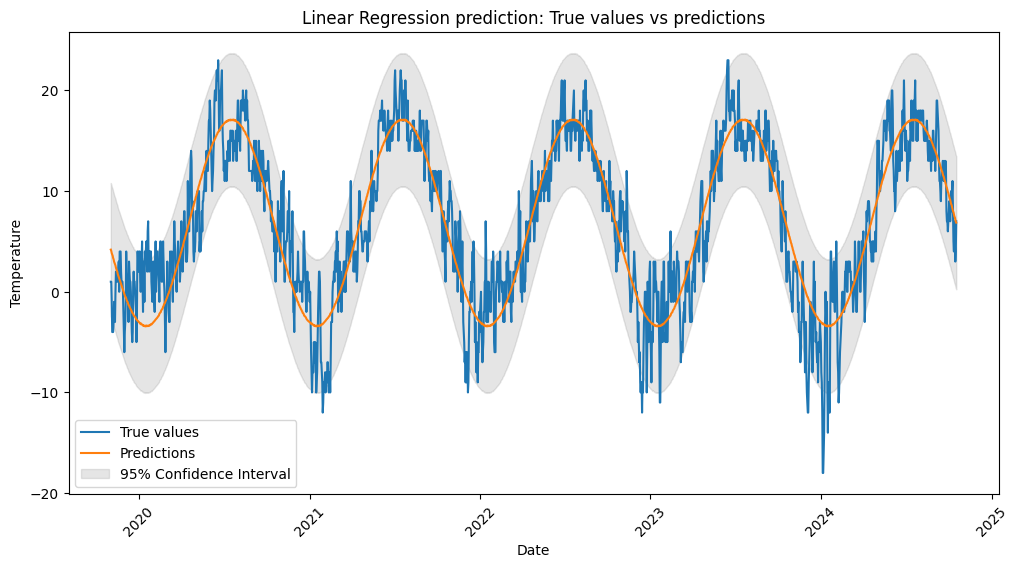

In [5]:
run_notebook('data_serving_LinearRegression.ipynb')

print_saved_plots()

### 3.2 Long Short-Term Memory (LSTM)

2024-11-25 14:16:14.379641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 14:16:15.234600: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 14:16:15.240921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 14:16:17.345987: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Finished executing data_serving_lstm.ipynb

[Stage 0:>                                                          (0 + 1) / 1]
                                                                                
[Stage 1:>                                                          (0 + 1) / 1]
                                                                                
+----------+-----------+--------+--------+
|      date|temperature|feature1|feature2|
+----------+-----------+--------+--------+
|2000-01-01|         -6|    0.02|     1.0|
|2000-01-02|         -1|    0.03|     1.0|
|2000-01-03|          2|    0.05|     1.0|
|2000-01-04|          2|    0.07|     1.0|
|2000-01-05|         -1|    0.09|     1.0|
|2000-01-06|          5|     0.1|    0.99|
|2000-01-07|          4|    0.12|    0.99|
|2000-01-08|          6|    0.14|    0.99|
|2000-01-09|          1|    0.15|    0.99|
|2000-01-10|          0|    0.17|    0.99|
|2000-01-11|          3|    0.19|    0.98|
|2000-01-12|          2|    0.

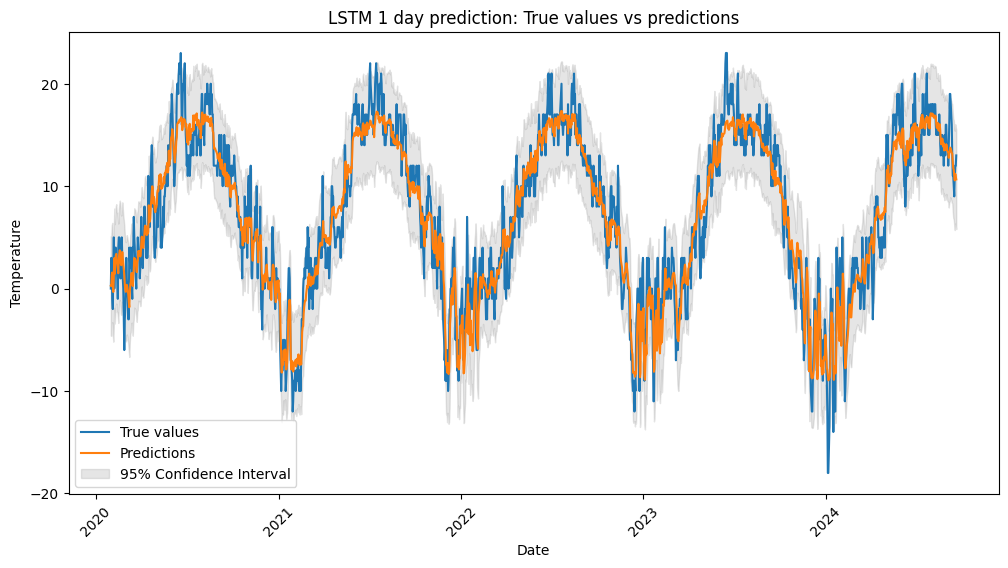

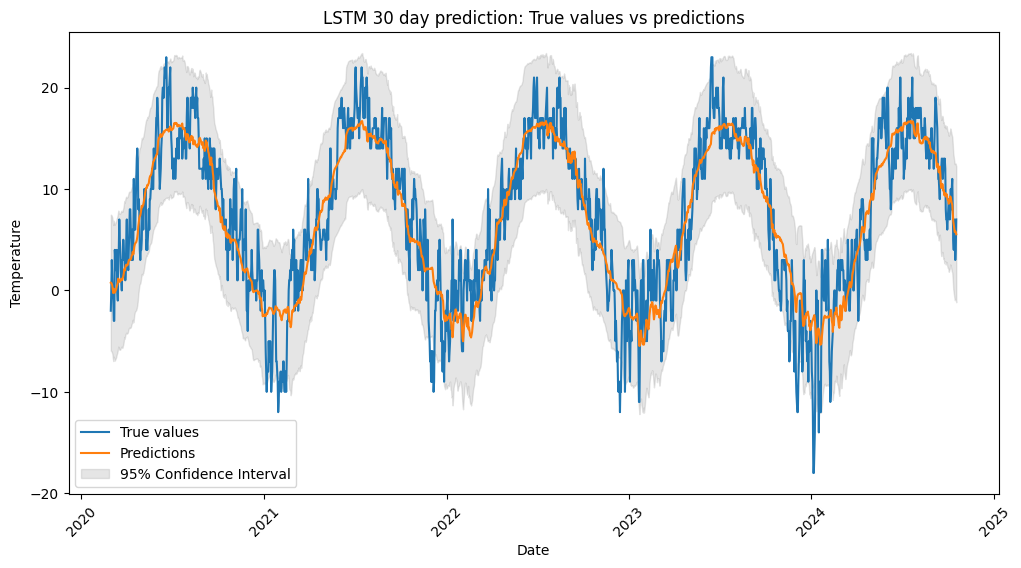

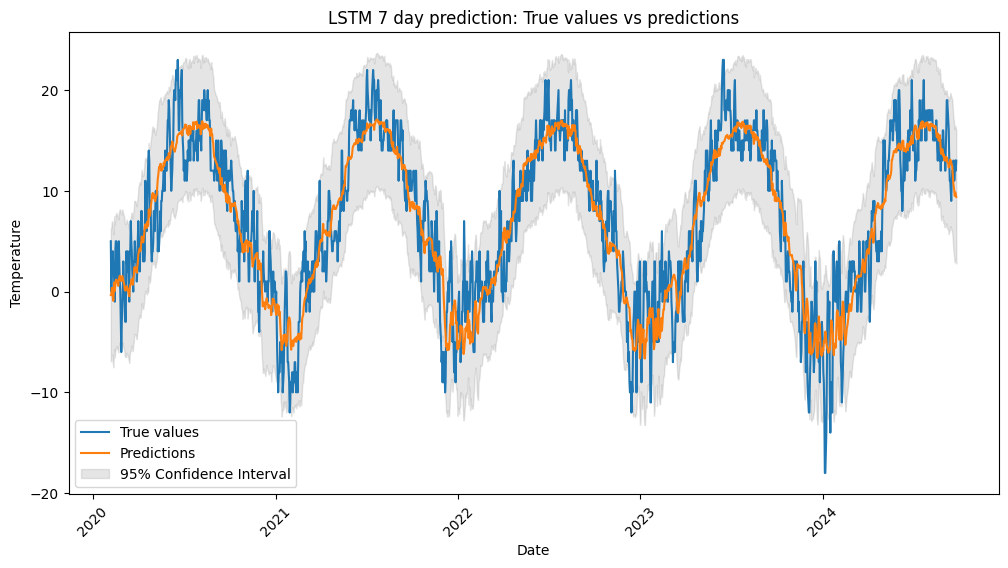

In [6]:
run_notebook('data_serving_lstm.ipynb')

print_saved_plots()

### 3.3 Convolutional Neural Network (CNN)

2024-11-25 14:26:43.462084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 14:26:43.517160: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 14:26:43.518214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 14:26:45.438138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Finished executing data_serving_cnn.ipynb

[Stage 0:>                                                          (0 + 1) / 1]
                                                                                
[Stage 1:>                                                          (0 + 1) / 1]
                                                                                
+----------+-----------+--------+--------+
|      date|temperature|feature1|feature2|
+----------+-----------+--------+--------+
|2000-01-01|         -6|    0.02|     1.0|
|2000-01-02|         -1|    0.03|     1.0|
|2000-01-03|          2|    0.05|     1.0|
|2000-01-04|          2|    0.07|     1.0|
|2000-01-05|         -1|    0.09|     1.0|
|2000-01-06|          5|     0.1|    0.99|
|2000-01-07|          4|    0.12|    0.99|
|2000-01-08|          6|    0.14|    0.99|
|2000-01-09|          1|    0.15|    0.99|
|2000-01-10|          0|    0.17|    0.99|
|2000-01-11|          3|    0.19|    0.98|
|2000-01-12|          2|    0.2

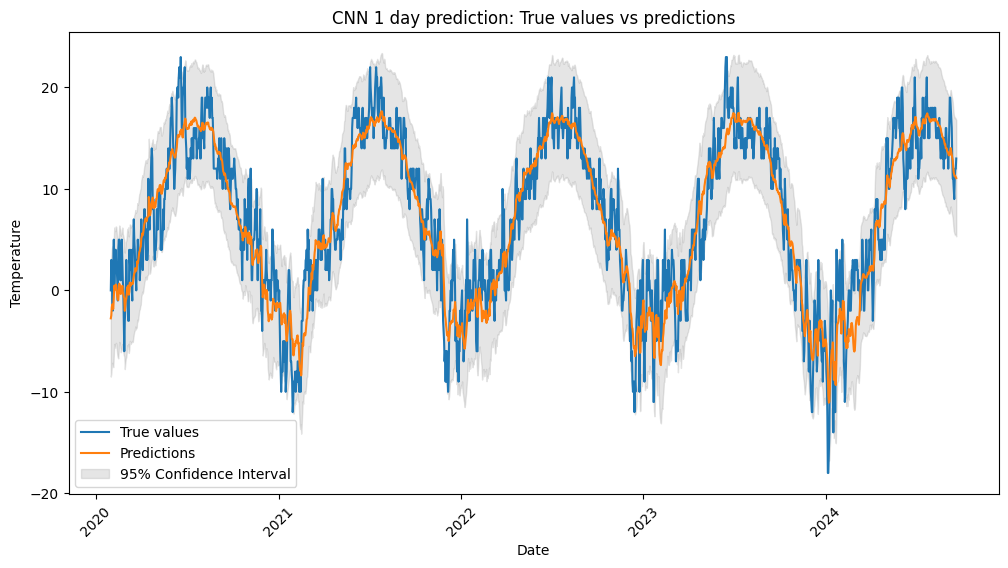

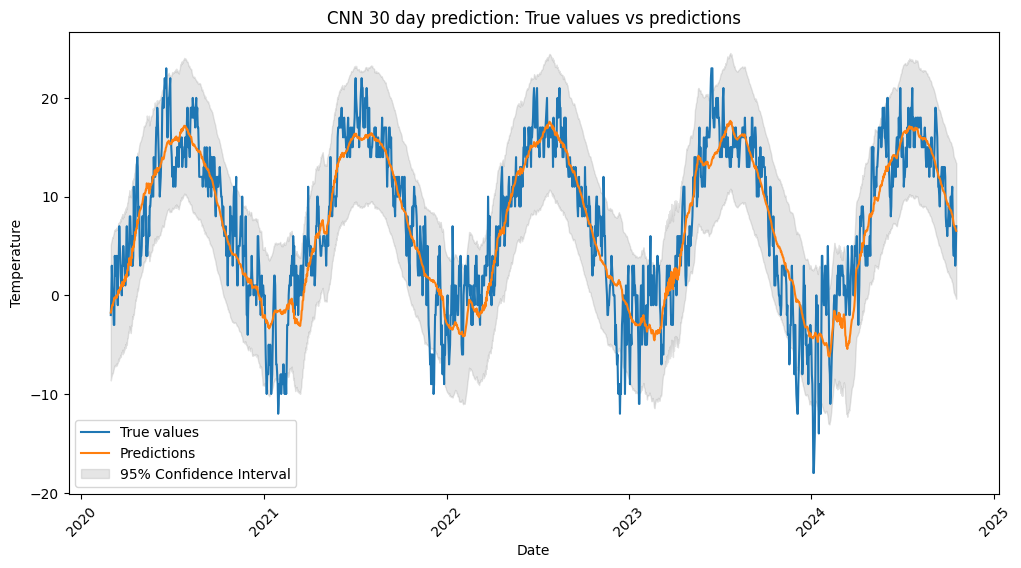

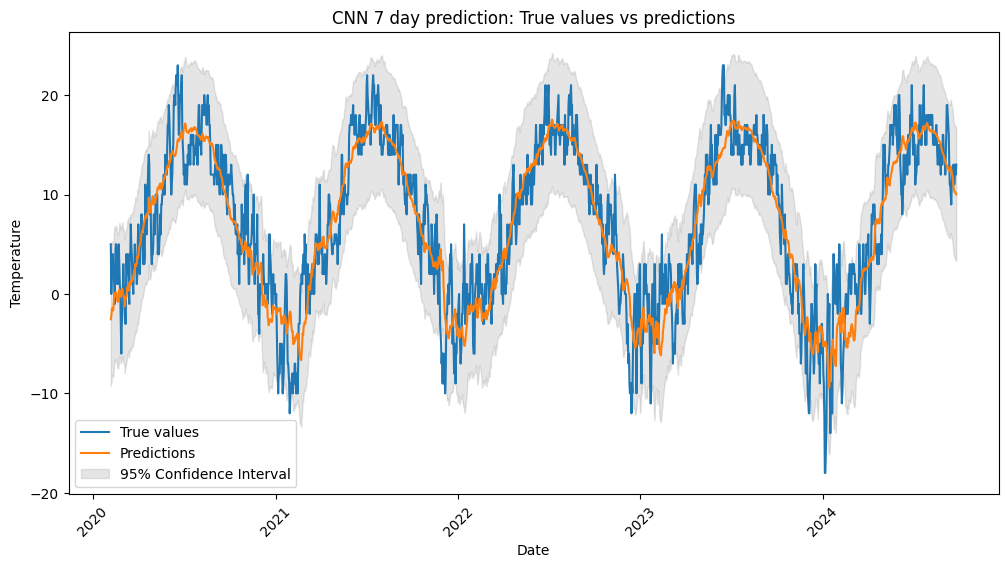

In [7]:
run_notebook('data_serving_cnn.ipynb')

print_saved_plots()